In [27]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# M-BERT

In [68]:
directory = 'D:\Programming\mastersthesis\models'
 
rootdir = 'D:\Programming\mastersthesis\models'

df = [['pruning_method','model','run','parameter','accuracy','loss']]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == "eval_results.txt" and "checkpoint" not in subdir and "mbert" in subdir:
            path = os.path.join(subdir, file)
            # Parse path
            training_arguments = path.split(sep="\\")[4:]; training_arguments.pop(1); training_arguments.pop(-1)
            parsed_model = training_arguments[1].split(sep="_")

            # Separate bert_x to bert and x
            training_arguments.insert(1,parsed_model[0]); training_arguments.insert(2,int(parsed_model[1])); training_arguments.pop(3)

            # Parse metrics
            metrics_df = pd.read_csv(path,delimiter="\n",header=None)
            accuracy = metrics_df.iloc[[0]].values[0][0][6:]
            eval_avg_entropy = metrics_df.iloc[[1]].values[0][0][19:]

            # Create list for dataframe
            training_arguments.append(accuracy); training_arguments.append(eval_avg_entropy); df.append(training_arguments)
df = pd.DataFrame(df)
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df.accuracy = df.accuracy.apply(float)
df.loss = df.loss.apply(float)
df['weight'] = float("-inf")
df.weight = df.weight.apply(float)

## Baseline

In [69]:
acc_1 = df.loc[
    (df.pruning_method == 'baseline')
    &
    (df.parameter == 'threshold100')
    &
    (df.run == 1)
].accuracy.values

loss_1 = df.loc[
    (df.pruning_method == 'baseline')
    &
    (df.parameter == 'threshold100')
    &
    (df.run == 1)
].loss.values

acc_2 = df.loc[
    (df.pruning_method == 'baseline')
    &
    (df.parameter == 'threshold100')
    &
    (df.run == 2)
].accuracy.values

loss_2 = df.loc[
    (df.pruning_method == 'baseline')
    &
    (df.parameter == 'threshold100')
    &
    (df.run == 2)
].loss.values

acc_3 = df.loc[
    (df.pruning_method == 'baseline')
    &
    (df.parameter == 'threshold100')
    &
    (df.run == 3)
].accuracy.values

loss_3 = df.loc[
    (df.pruning_method == 'baseline')
    &
    (df.parameter == 'threshold100')
    &
    (df.run == 3)
].loss.values

In [70]:
tmp_list = [['pruning_method','model','run','parameter','accuracy','loss','weight']]
for wght in [0.9, 0.7, 0.5, 0.25, 0.15, 0.03]:
    tmp_list.append(
        ['baseline','bert',1,'threshold100',acc_1[0],loss_1[0],wght]
    )

    tmp_list.append(
        ['baseline','bert',2,'threshold100',acc_2[0],loss_2[0],wght]
    )

    tmp_list.append(
        ['baseline','bert',3,'threshold100',acc_3[0],loss_3[0],wght]

    )

df_2 = pd.DataFrame(tmp_list)
df_2 = df_2.rename(columns=df_2.iloc[0]).drop(df_2.index[0])

In [71]:
df = pd.concat(
    (df,df_2)
)
df.reset_index(drop=True,inplace=True);

## $L_0$ regularization

In [72]:
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda05"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda3"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda4_5"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda7"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda50"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'l0_regularization') & (df['parameter'] == "lambda250"), 'weight'] = 0.03

## Soft movement pruning

In [73]:
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda05"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda08"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda4_5"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda7"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda50"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'soft_movement_pruning') & (df['parameter'] == "lambda250"), 'weight'] = 0.03

## Magnitude pruning

In [74]:
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold09"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold07"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold05"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold025"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold015"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'magnitude_pruning') & (df['parameter'] == "threshold003"), 'weight'] = 0.03

## Movement pruning

In [75]:
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold09"), 'weight'] = 0.9
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold07"), 'weight'] = 0.7
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold05"), 'weight'] = 0.5
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold025"), 'weight'] = 0.25
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold015"), 'weight'] = 0.15
df.loc[(df['pruning_method'] == 'movement_pruning') & (df['parameter'] == "threshold003"), 'weight'] = 0.03

In [76]:
df = df.drop(df[df.weight == float("-inf")].index)

In [77]:
df = df.reset_index()
df = df[['pruning_method','model','run','parameter','accuracy','loss','weight']]
df.to_latex('mbert_experiements_latex_code.tex',index=False)

In [83]:
scatter_df = df.loc[
        (df.weight == 0.03)
        &
        (df.pruning_method != 'baseline')
        &
        (df.pruning_method != 'movement_pruning')
    ]
scatter_df

,pruning_method,model,run,parameter,accuracy,loss,weight
1,l0_regularization,mbert,1,lambda250,0.826835,1.043753,0.03
7,l0_regularization,mbert,2,lambda250,0.833716,1.04164,0.03
13,l0_regularization,mbert,3,lambda250,0.822248,1.043404,0.03
18,magnitude_pruning,mbert,1,threshold003,0.826835,1.251284,0.03
24,magnitude_pruning,mbert,2,threshold003,0.827982,1.26142,0.03
30,magnitude_pruning,mbert,3,threshold003,0.816514,1.261746,0.03
56,soft_movement_pruning,mbert,1,lambda250,0.850917,1.094991,0.03
62,soft_movement_pruning,mbert,2,lambda250,0.851035,1.094423,0.03
68,soft_movement_pruning,mbert,3,lambda250,0.848378,1.094238,0.03


D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



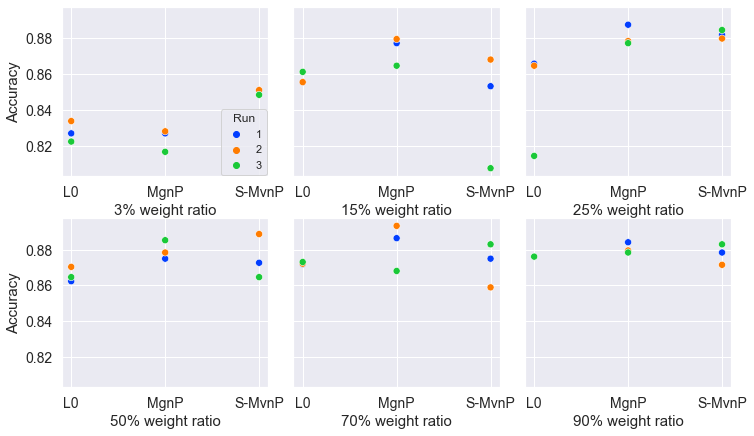

In [90]:
df.accuracy = pd.to_numeric(df.accuracy)
df.weight = pd.to_numeric(df.weight)

fig, ax = plt.subplots(
    ncols=3,
    nrows=2,
    sharex=False,
    sharey=True,
    figsize=(12,7)
)

for i in ax:
    for j in i:
        j.tick_params(axis='y', which='both', labelsize=14)
        j.tick_params(axis='x', which='both', labelsize=14)

plt.subplots_adjust(wspace=0.12, hspace=0.25)
n = 0
sns.color_palette('bright')
weight_labels = [['3% weight ratio','15% weight ratio','25% weight ratio'],
                ['50% weight ratio','70% weight ratio','90% weight ratio']]

list_weights = df.weight.unique()
list_weights.sort()
for i, weight in enumerate(list_weights):
    if i > 2:
        n = 1
        i = i % 3

    scatter_df = df.loc[
        (df.weight == weight)
        &
        (df.pruning_method != 'movement_pruning')
        &
        (df.pruning_method != 'baseline')
        &
        (df.accuracy > 0.6)
    ];

    scatter_df.loc[ df["pruning_method"] == 'magnitude_pruning', 'pruning_method'] = 'MgnP';
    scatter_df.loc[ df["pruning_method"] == 'soft_movement_pruning', 'pruning_method'] = 'S-MvnP';
    scatter_df.loc[ df["pruning_method"] == 'l0_regularization', 'pruning_method'] = 'L0';

    sns.scatterplot(data=scatter_df,y='accuracy',x='pruning_method',hue='run',ax=ax[n][i], s=50, palette='bright')
    ax[n][i].set_xlabel(weight_labels[n][i],fontsize=15)
    ax[n][i].set_ylabel('Accuracy',fontsize=15)

    if n != 1 or n != 0 and i != 1:
        ax[n][i].get_legend().remove()

    if n == 1 and i == 1:
        ax[n][i].legend(loc='center', bbox_to_anchor=(-0.24,1.45),title='Run')
        
fig.savefig('scatter_runs_mbert.png',dpi=400,bbox_inches='tight')

In [14]:
mean_df = [
    ['pruning_method','weight','mean_accuracy','mean_loss']
]
for method in df.pruning_method.unique():
    for weight in df.weight.unique():
        mean_acc = df.loc[

            (df.pruning_method == method)
            &
            (df.weight == weight)

            ]['accuracy'].mean()
        
        mean_loss = df.loc[

            (df.pruning_method == method)
            &
            (df.weight == weight)

            ]['loss'].mean()

        mean_df.append(
            [method, weight, mean_acc, mean_loss]
        )

mean_df = pd.DataFrame(mean_df)
mean_df = mean_df.rename(columns=mean_df.iloc[0]).drop(mean_df.index[0])
mean_df.mean_accuracy = mean_df.mean_accuracy.apply(float)
mean_df.mean_loss = mean_df.mean_loss.apply(float)
mean_df.weight = mean_df.weight.apply(float)

In [15]:
mean_df = mean_df.reset_index()
mean_df = mean_df[['pruning_method','weight','mean_accuracy','mean_loss']]
mean_df.to_latex('mbert_experiements_mean_latex_code.tex',index=False,float_format="%.3f")
mean_df

,pruning_method,weight,mean_accuracy,mean_loss
0,l0_regularization,0.90,0.631498,1.672310
1,l0_regularization,0.03,0.827599,1.042932
2,l0_regularization,0.70,0.872405,1.059639
3,l0_regularization,0.50,0.865826,1.042119
4,l0_regularization,0.15,0.857416,1.019274
5,l0_regularization,0.25,0.848242,1.051860
6,magnitude_pruning,0.90,0.880734,1.048696
7,magnitude_pruning,0.03,0.823777,1.258150
8,magnitude_pruning,0.70,0.882645,1.045844
9,magnitude_pruning,0.50,0.879587,1.041875


In [16]:
std_df = [
    ['pruning_method','weight','std_accuracy','std_loss']
]
for method in df.pruning_method.unique():
    for weight in df.weight.unique():
        std_acc = df.loc[

            (df.pruning_method == method)
            &
            (df.weight == weight)

            ]['accuracy'].std()
        
        std_loss = df.loc[

            (df.pruning_method == method)
            &
            (df.weight == weight)

            ]['loss'].std()

        std_df.append(
            [method, weight, std_acc, std_loss]
        )

std_df = pd.DataFrame(std_df)
std_df = std_df.rename(columns=std_df.iloc[0]).drop(std_df.index[0])
std_df.std_accuracy = std_df.std_accuracy.apply(float)
std_df.std_loss = std_df.std_loss.apply(float)
std_df.weight = std_df.weight.apply(float)

In [17]:
std_df = std_df.reset_index()
std_df = std_df[['pruning_method','weight','std_accuracy','std_loss']]
std_df.to_latex('mbert_experiements_std_latex_code.tex',index=False,float_format="%.3f")
std_df

,pruning_method,weight,std_accuracy,std_loss
0,l0_regularization,0.90,0.211872,0.530649
1,l0_regularization,0.03,0.005772,0.001133
2,l0_regularization,0.70,0.000641,0.000000
3,l0_regularization,0.50,0.004135,0.005309
4,l0_regularization,0.15,0.003310,0.003769
5,l0_regularization,0.25,0.029469,0.034247
6,magnitude_pruning,0.90,0.003034,0.002979
7,magnitude_pruning,0.03,0.006316,0.005948
8,magnitude_pruning,0.70,0.013042,0.009559
9,magnitude_pruning,0.50,0.005255,0.005968


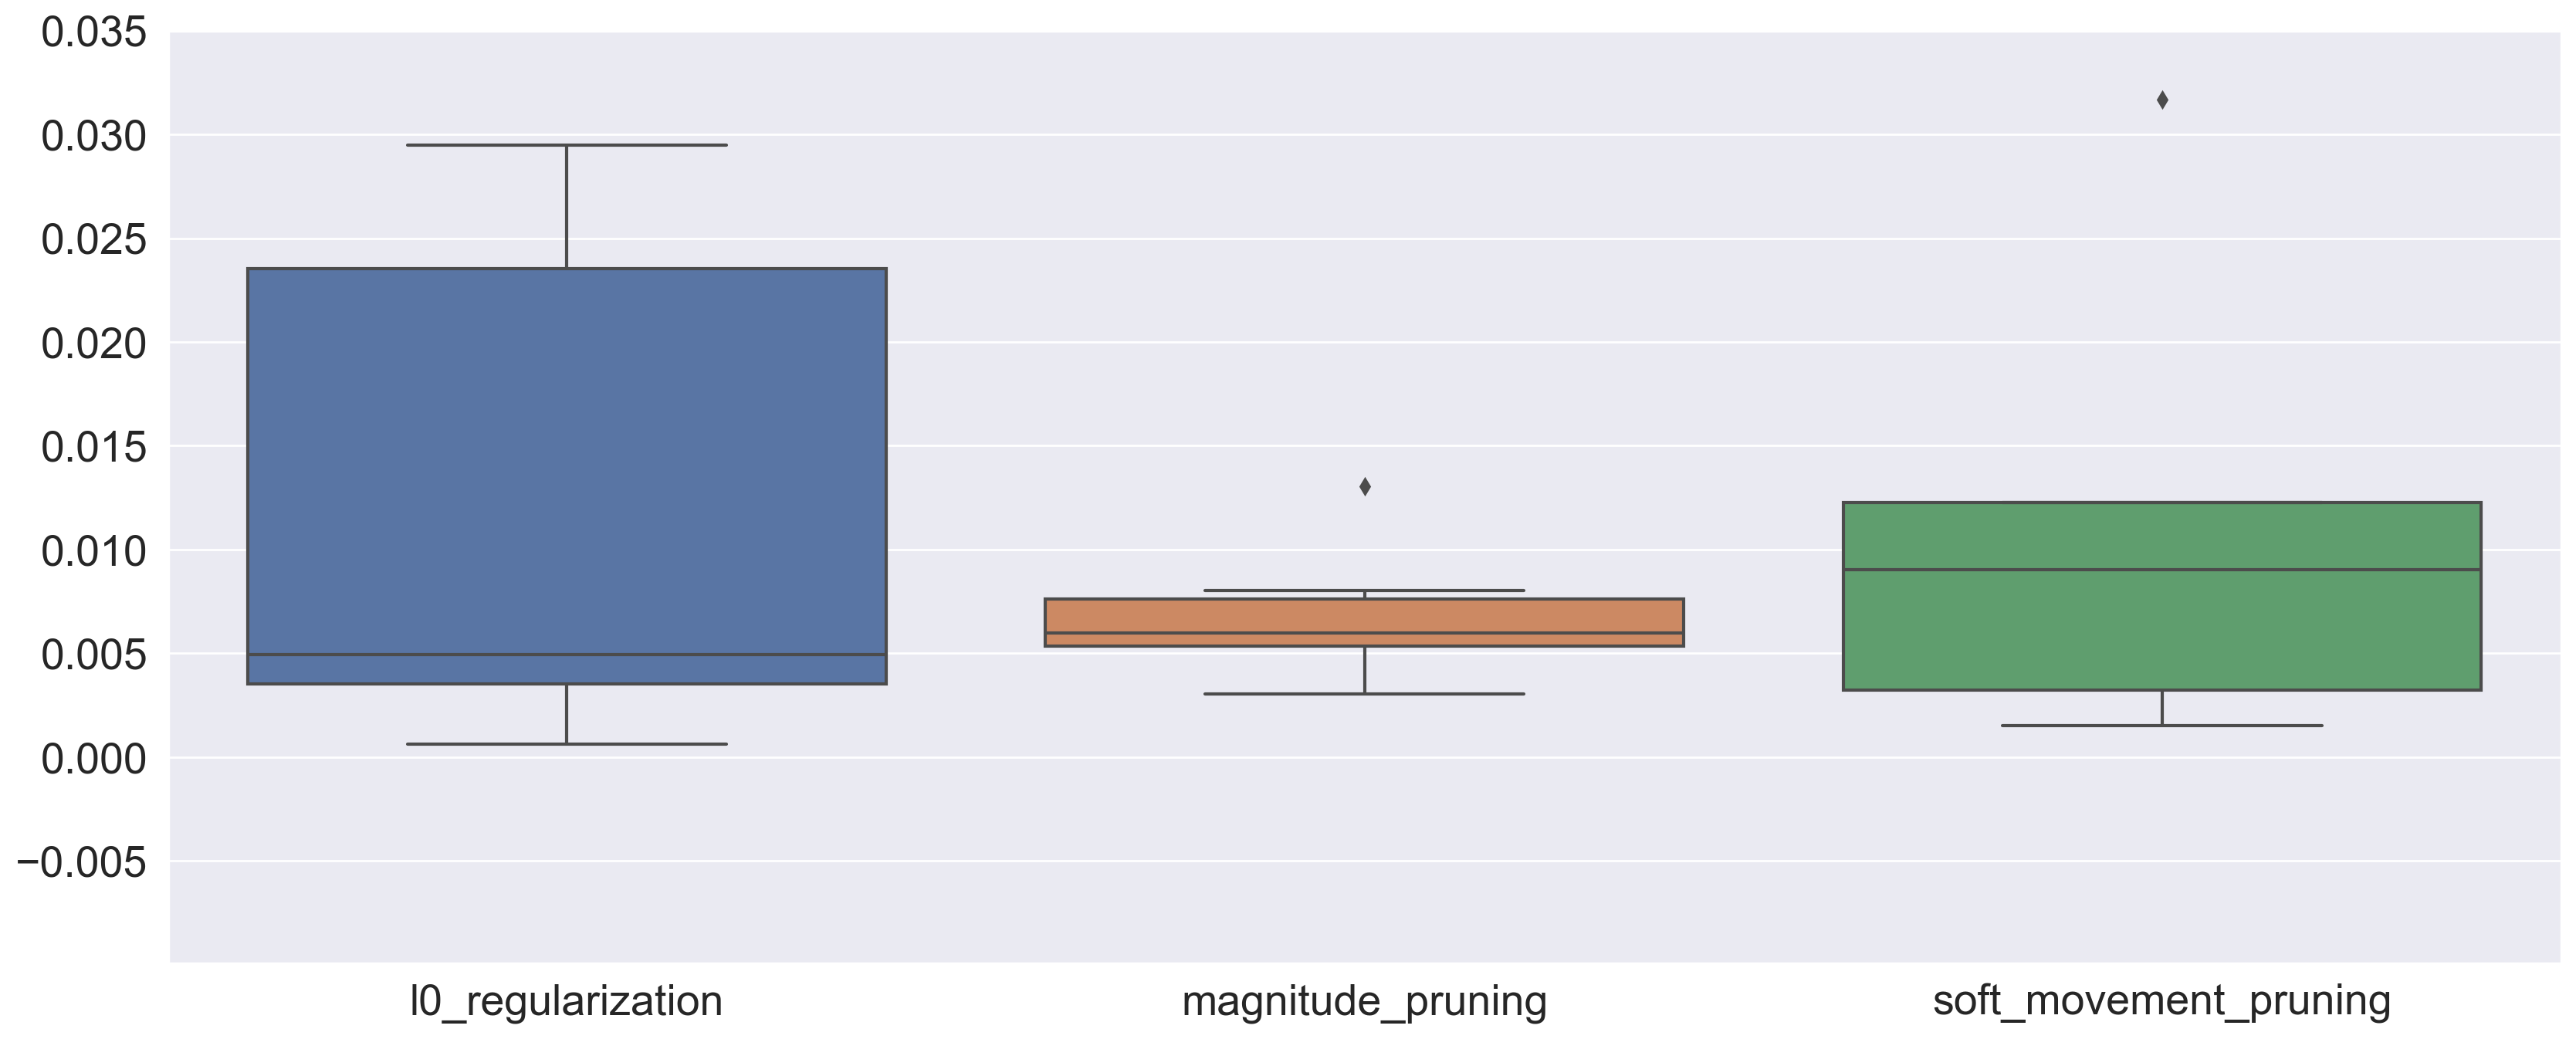

In [18]:
box_list = np.array([
    std_df.loc[(std_df.pruning_method == 'l0_regularization')].std_accuracy.values,
    std_df.loc[(std_df.pruning_method == 'magnitude_pruning')].std_accuracy.values,
    std_df.loc[(std_df.pruning_method == 'movement_pruning')].std_accuracy.values,
    std_df.loc[(std_df.pruning_method == 'soft_movement_pruning')].std_accuracy.values,
    std_df.loc[(std_df.pruning_method == 'baseline')].std_accuracy.values
])
box_list = np.transpose(box_list)
box_list = pd.DataFrame(box_list)
box_list.columns = std_df.pruning_method.unique()
box_list.drop(columns=('movement_pruning'),inplace=True)
box_list.drop(columns=('baseline'),inplace=True)
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(
    nrows = 1,
    ncols = 1,
    dpi=200
)
fig.set_size_inches(20,8)
sns.boxplot(data=box_list)
ax.tick_params(axis='both', which='major',labelsize=20);
ax.set_ylim(None,0.035);
fig.savefig('boxplot_standard_deviation_mbert',bbox_inches='tight')

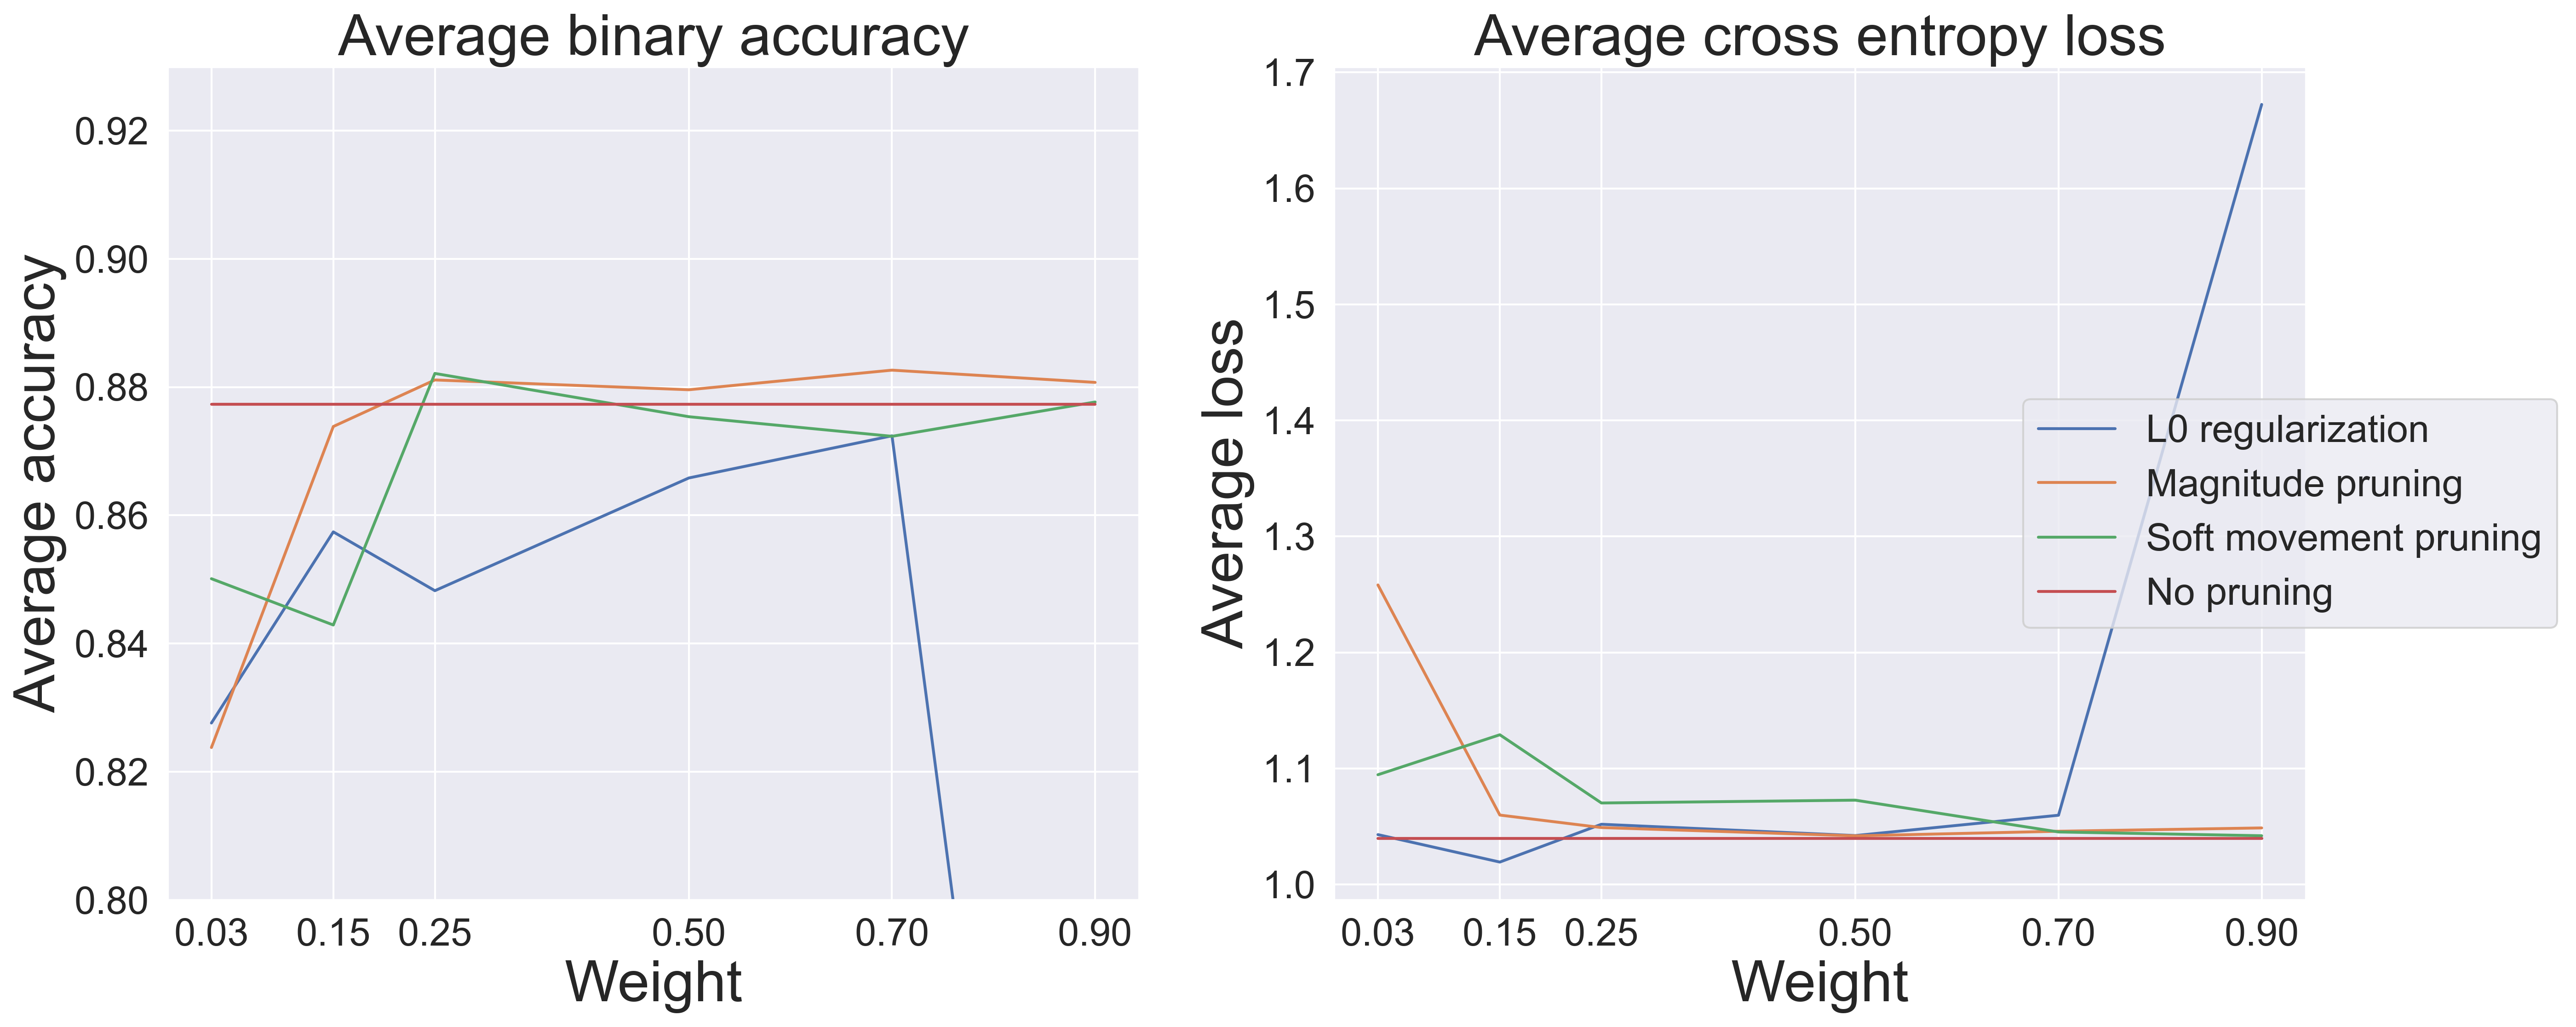

In [19]:
sns.set_theme(style="darkgrid")
methods = df.pruning_method.unique()
methods = np.delete(methods, np.where(methods == 'movement_pruning'))

fig, ax = plt.subplots(
    nrows = 1,
    ncols = 2,
    dpi=300
)
fig.set_size_inches(20,8)

for method in methods:

    weights = mean_df.loc[
        mean_df.pruning_method == method
    ]['weight']

    acc = mean_df.loc[
        mean_df.pruning_method == method
    ]['mean_accuracy']


    loss = mean_df.loc[
        mean_df.pruning_method == method
    ]['mean_loss']


    sns.lineplot(y=acc,x=weights,ax=ax[0]);
    sns.lineplot(y=loss,x=weights,ax=ax[1]);

ax[0].set_xlabel("Weight", fontsize=30);
ax[0].set_ylabel("Average accuracy", fontsize=30);
ax[0].set_xticks([0.03, 0.15, 0.25, 0.5, 0.7, 0.9]);
ax[1].set_xticks([0.03, 0.15, 0.25, 0.5, 0.7, 0.9])

ax[1].set_xlabel("Weight", fontsize=30);
ax[1].set_ylabel("Average loss", fontsize=30);
fig.legend(
    labels=['L0 regularization','Magnitude pruning','Soft movement pruning','No pruning'],
    fontsize=20,
    loc='right'
);
ax[0].tick_params(axis='both', which='major',labelsize=20);
ax[1].tick_params(axis='both', which='major',labelsize=20);

ax[0].set_title('Average binary accuracy',fontsize=30);
ax[1].set_title('Average cross entropy loss',fontsize=30);

ax[0].set_ylim(0.8,0.93);

In [20]:
fig.savefig('average_metrics_MBERT',bbox_inches='tight')